# Linear Regression 

Linear Regression using  california housing dataset (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_california_housing
cali = fetch_california_housing()
print(cali.DESCR)
#boston_df = boston.data

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
cali_df = pd.DataFrame(cali.data, columns=cali.feature_names)
cali_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
cali_df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

<AxesSubplot:>

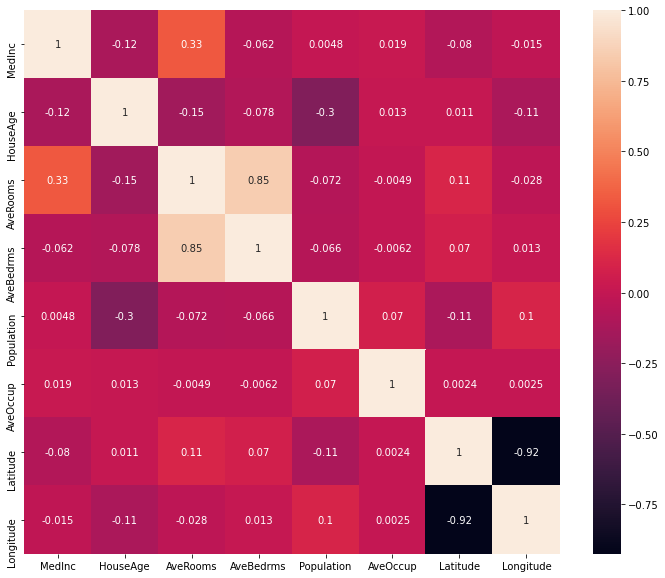

In [5]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(12, 10)
sns.heatmap(cali_df.corr(), annot=True)

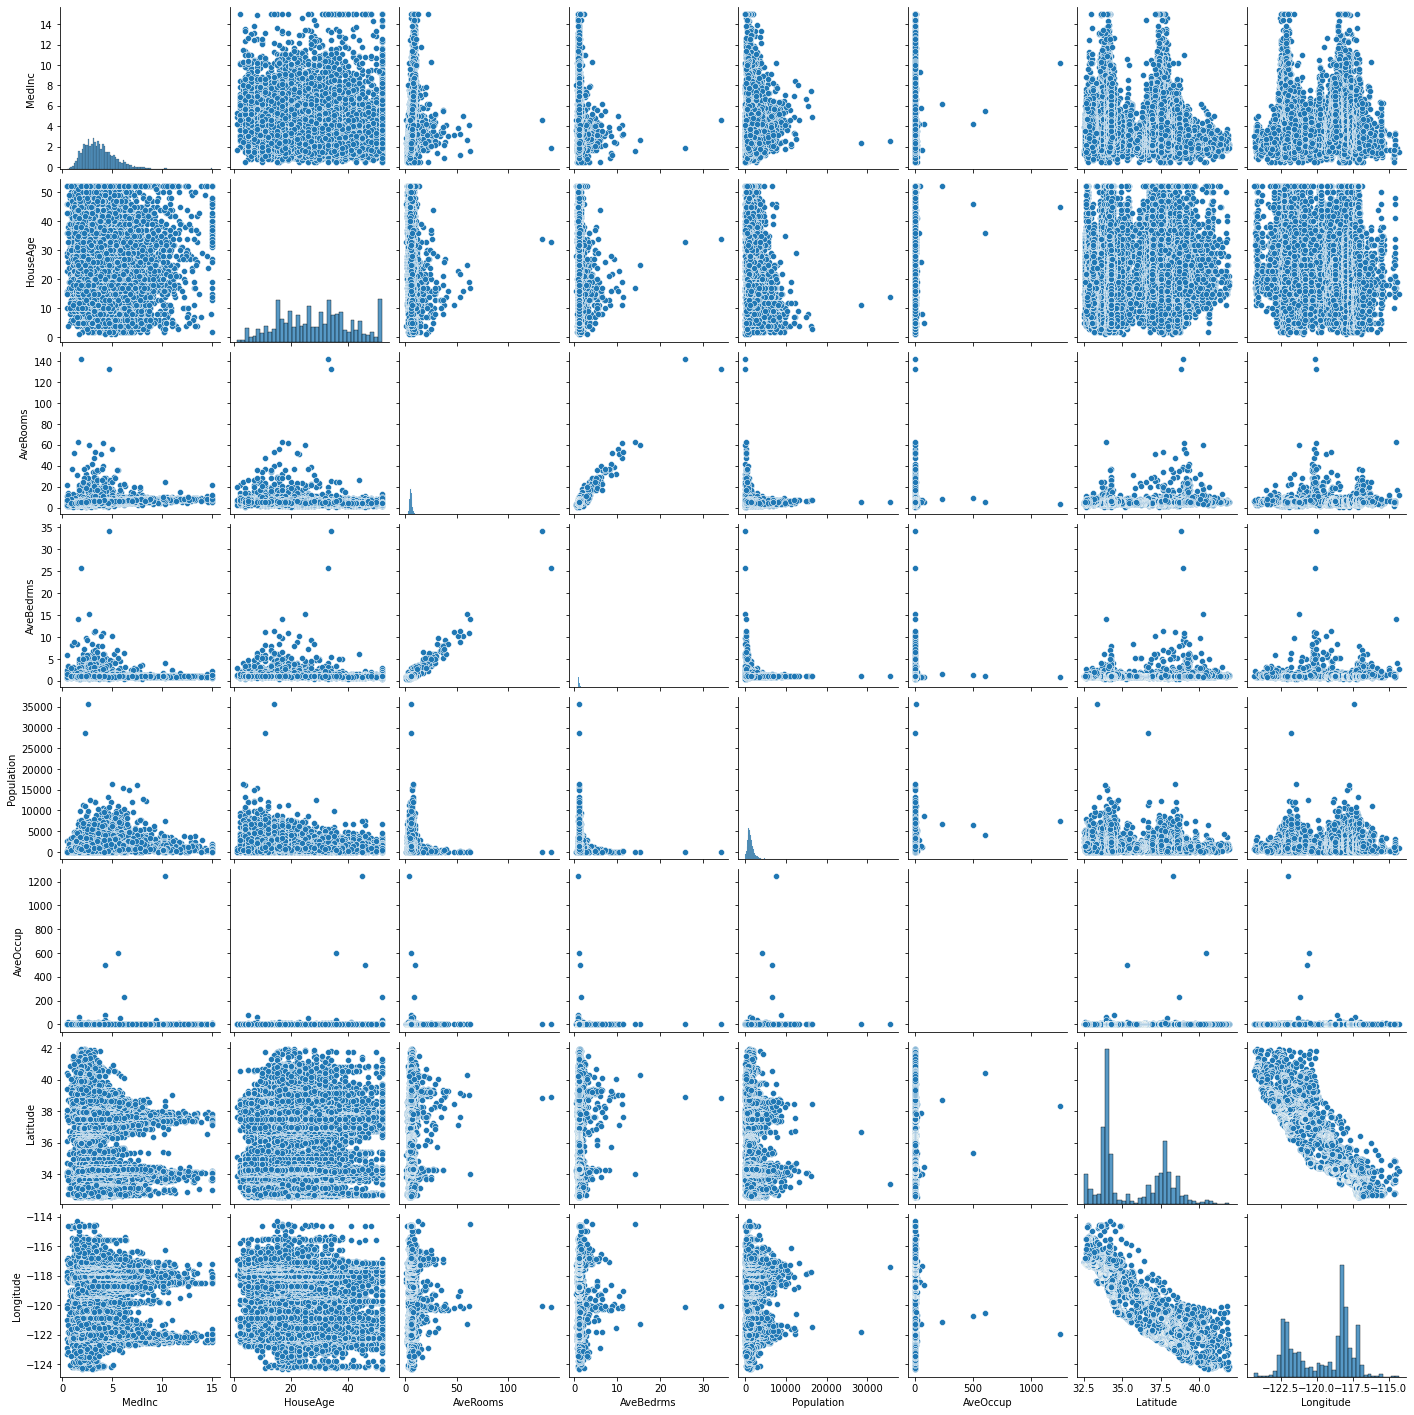

In [6]:
sns.pairplot(cali_df)

jajajaja sale california 

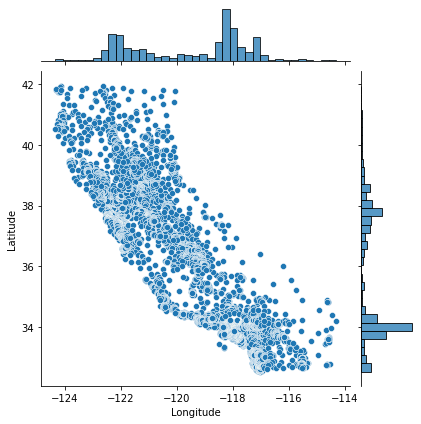

In [7]:
sns.jointplot(x='Longitude',y='Latitude',data=cali_df)

In [8]:
X = cali_df
Y = cali.target

In [9]:
Y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

In [11]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [12]:
lm.fit(X_train,y_train)

LinearRegression()

In [13]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
MedInc,0.430863
HouseAge,0.010235
AveRooms,-0.104017
AveBedrms,0.537429
Population,0.000018
AveOccup,-0.147743
Latitude,-0.419256
Longitude,-0.424321


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **MedInc** is associated with an **increase of 0.430863**.
- Holding all other features fixed, a 1 unit increase in **House Age** is associated with an **increase of 0.010235**.
- Holding all other features fixed, a 1 unit increase in **Ave Number of Rooms** is associated with an **increase of - 0.104017**.
- Holding all other features fixed, a 1 unit increase in **Avg. Number of Bedrooms** is associated with an **increase of 0.537429**.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of 0.000018**.
- Holding all other features fixed, a 1 unit increase in **Avg. Occupn** is associated with an **increase of -0.147743**.
- Holding all other features fixed, a 1 unit increase in **Latitude** is associated with an **increase of -0.419256**.
- Holding all other features fixed, a 1 unit increase in **Longitude** is associated with an **increase of -0.424321**.


Remember that:
Each value corresponds to the average house value in units of 100,000.

## Predictions

In [14]:
predictions = lm.predict(X_test)

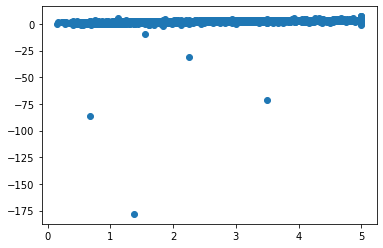

In [15]:
plt.scatter(y_test,predictions)

/Users/rodrigoespinola/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


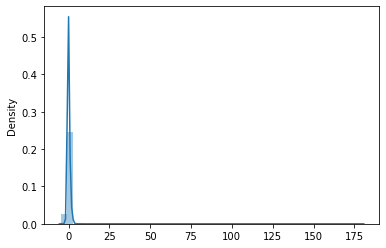

In [16]:
sns.distplot((y_test-predictions),bins=50);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [17]:
from sklearn import metrics


In [18]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.5620561497050923
MSE: 6.160634987005604
RMSE: 2.4820626476794665


In [19]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=0.25, random_state=101)

In [20]:
lm.fit(X_train1,y_train1)

LinearRegression()

In [21]:
coeff_df1 = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df1

,Coefficient
MedInc,0.440303
HouseAge,0.009719
AveRooms,-0.109966
AveBedrms,0.617871
Population,-0.000002
AveOccup,-0.007987
Latitude,-0.413269
Longitude,-0.426269


In [22]:
predictions1 = lm.predict(X_test1)

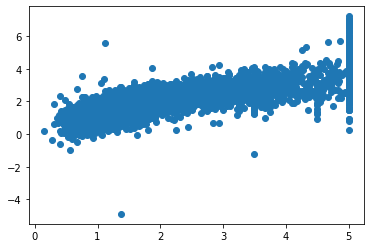

In [23]:
plt.scatter(y_test1,predictions1)

/Users/rodrigoespinola/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


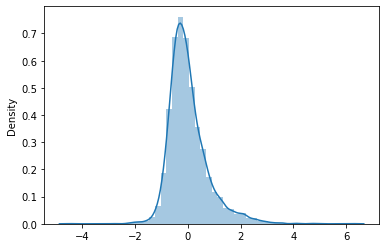

In [24]:
sns.distplot((y_test1-predictions1),bins=50);

In [25]:
print('MAE:', metrics.mean_absolute_error(y_test1, predictions1))
print('MSE:', metrics.mean_squared_error(y_test1, predictions1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test1, predictions1)))

MAE: 0.5383440260553992
MSE: 0.5560774769195416
RMSE: 0.7457060258034272


In [26]:
print('R**2:', metrics.r2_score(y_test1, predictions1))

R**2: 0.5862235828098887
